<a href="https://colab.research.google.com/github/jdeversdev/Data-Analytics-WGU/blob/master/D209_JD_TSK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I: Research Question

**A1.**  Can we predict whether a patient, based on their age, gender, complication risk assessment, high blood pressure status, diabetes status, and overweight status, will experience a medical complication during their hospital stay?

**A2.**

The goals of the data analysis are to predict the likelihood of a patient experiencing medical complications during their hospital stay. This involves using age, gender, complication risk assessment, high blood pressure status, diabetes status, and overweight status as predictors to provide valuable insights into potential medical risks for patients.

# Part II: Method Justification

**B1.**

The Random Forest method works by creating multiple decision trees from the data, each considering different parts of the dataset. The final prediction is made by taking the majority vote from all the trees. This approach is effective because it reduces the risk of making errors that might occur if we relied on just one decision tree.

The expected outcome is a more accurate and reliable prediction about whether a patient will experience a medical complication during their hospital stay, based on their demographic and health-related data.


---



**B2.**

One important assumption in using Random Forest is that the features in the dataset should be meaningful and actually help in making accurate predictions. As mentioned in the quote from GeeksforGeeks, "There should be some actual values in the feature variable of the dataset so that the classifier can predict accurate results rather than a guessed result." This means that if the features don’t hold valuable information, the model might struggle to make good predictions.


---


**B3.**

- **pandas**: Handles data manipulation and analysis, making it easy to work with datasets.

- **matplotlib.pyplot**: Used for creating static, interactive, and animated visualizations, helping to plot data.

- **seaborn**: Enhances data visualization with attractive and informative statistical graphics.

- **sklearn.model_selection.train_test_split**: Splits data into training and testing sets, essential for model evaluation.

- **sklearn.preprocessing.OneHotEncoder, LabelEncoder**: Encodes categorical variables into numerical format for machine learning models.

- **sklearn.ensemble.RandomForestClassifier**: Implements the Random Forest algorithm for classification tasks.

- **sklearn.metrics.classification_report, confusion_matrix, roc_auc_score, accuracy_score, mean_squared_error**: Provides various metrics to assess the model’s performance, including accuracy, confusion matrix, and error metrics.


# Part III: Data Preparation

**C1.**

One key data preprocessing goal for Random Forest is to prepare the dataset by handling missing values, encoding categorical variables, and ensuring the data is in a format suitable for accurate model training and predictions.

**C2.**

1. Age: Numeric
2. Gender: Categorical
3. HighBlood (High blood pressure): Categorical (Yes/No)
4. Diabetes: Categorical (Yes/No)
5. Overweight: Categorical (Yes/No)
6. Complication_risk (Dependent variable): Categorical (High/Medium/Low)

**C3.**

**1. Handling Missing Values & Duplicates:**
   - *Goal:* Ensure data completeness by addressing missing values and duplicates.
   - *Steps:*
     - Identify any missing values in the dataset.
     - Impute missing values using suitable techniques (e.g., mean, median, or mode).
     - Identify duplicates and remove them to avoid data redundancy.

**2. Outlier Detection and Removal:**
   - *Goal:* Improve data quality by identifying and addressing outliers that could skew the results.
   - *Steps:*
     - Use visualizations or statistical methods to detect outliers.
     - Remove or adjust extreme values to minimize their impact.

**3. Encoding Categorical Variables:**
   - *Goal:* Prepare categorical variables for analysis.
   - *Steps:*
     - Identify categorical variables in the dataset.
     - Apply one-hot encoding for variables with multiple categories (like 'Gender').
     - Use label encoding for binary categorical variables (like 'HighBlood'), where the order of the categories is important.


In [ ]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, mean_squared_error


# Load the dataset

data_csv = '/content/medical_clean.csv'
data = pd.read_csv(data_csv)

# Display the first few rows of the dataset
data.head()

# Checking the shape of the dataset
data_shape = data.shape
print("Data shape:", data_shape)

# Checking data types of each column
data_types = data.dtypes
print("Data types:", data_types)

# Checking for duplicates
duplicate_count = data.duplicated().sum()
print("Duplicate count:", duplicate_count)

Data shape: (10000, 50)
Data types: CaseOrder               int64
Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
TimeZone               object
Job                    object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hype

In [ ]:
# 1. Handling Missing Values
# Identify missing values
missing_values = data[['Age', 'Gender', 'Complication_risk', 'HighBlood', 'Diabetes', 'Overweight']].isnull().sum()
print(missing_values)

Age                  0
Gender               0
Complication_risk    0
HighBlood            0
Diabetes             0
Overweight           0
dtype: int64


<Axes: xlabel='Age'>

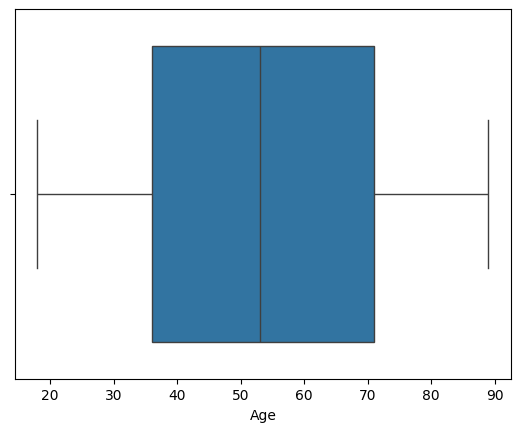

In [ ]:
# 2. Outlier Detection and Removal
# Visualize and detect outliers
# (Use plots such as box plots or scatter plots)
sns.boxplot(x=data['Age'])

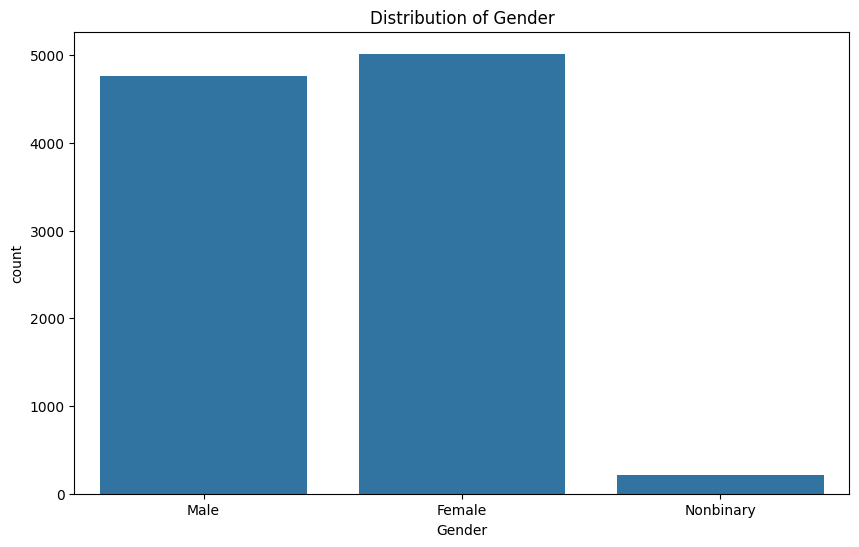

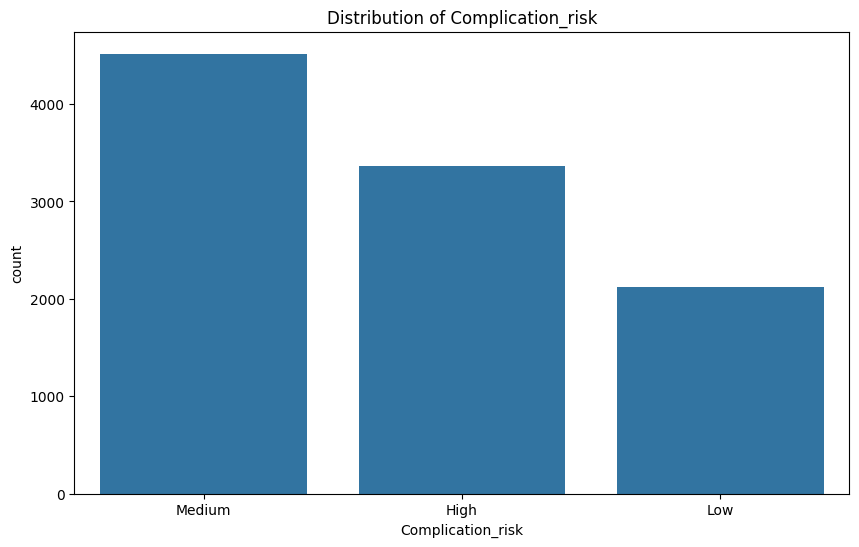

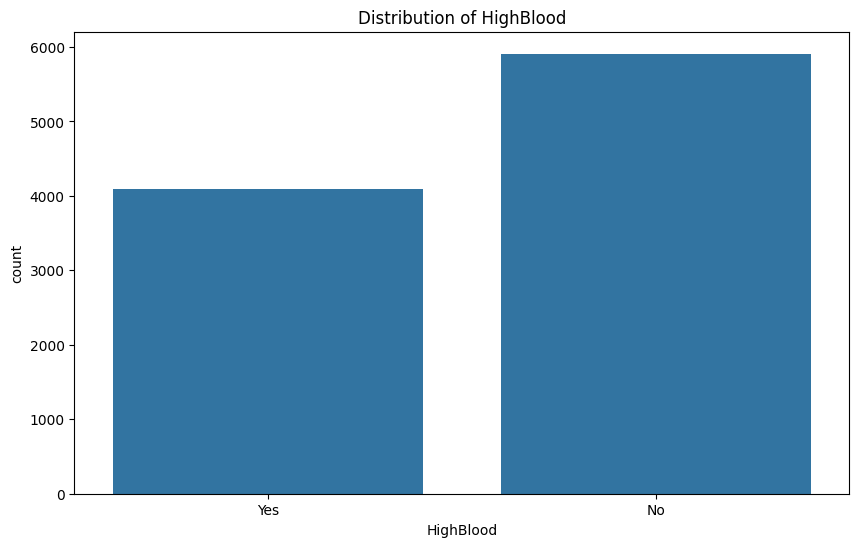

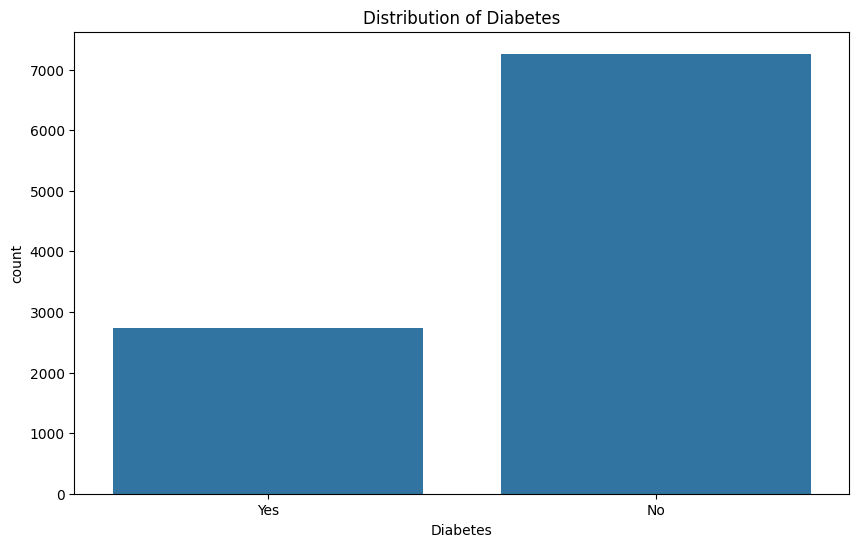

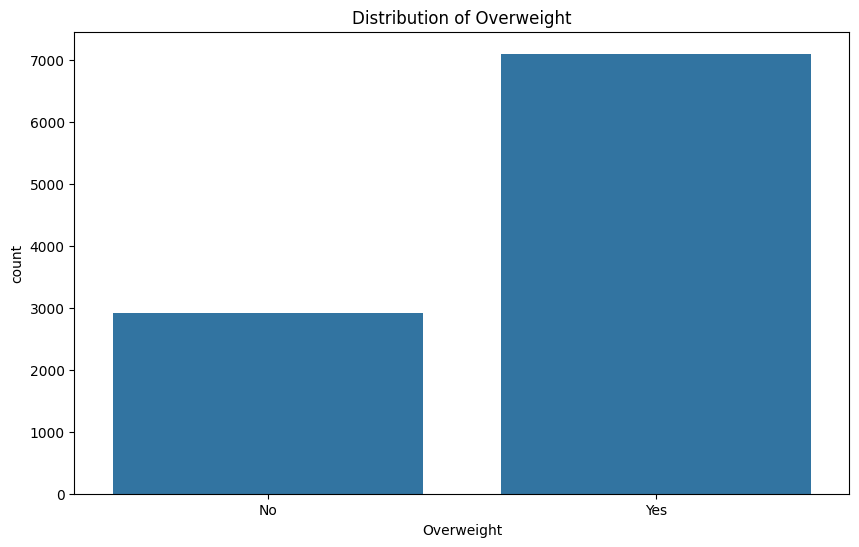

In [ ]:
# Check distribution of categorical variables to identify anomalies

categorical_vars = ['Gender', 'Complication_risk', 'HighBlood', 'Diabetes', 'Overweight']

for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[var])
    plt.title(f'Distribution of {var}')
    plt.show()

In [ ]:
# Create a copy of the relevant columns to work with
prepared_data = data[['Age', 'Gender', 'Complication_risk', 'HighBlood', 'Diabetes', 'Overweight']].copy()

# Initialize the OneHotEncoder without dropping categories
encoder = OneHotEncoder(sparse_output=False, drop=None)  # Do not drop any categories

# Separate independent variables (excluding 'Age' which is numerical)
X = prepared_data.drop('Complication_risk', axis=1)  # Independent variables
X_numerical = X[['Age']].copy()  # Numerical variable
X_categorical = X.drop('Age', axis=1)  # Categorical variables

# Apply one-hot encoding to the categorical independent variables
X_encoded = encoder.fit_transform(X_categorical)

# Convert to DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(X_categorical.columns))

# Manually drop specified columns
columns_to_drop = ['Gender_Nonbinary', 'HighBlood_No', 'Diabetes_No', 'Overweight_No']
X_encoded_df = X_encoded_df.drop(columns=columns_to_drop, errors='ignore')

# Combine encoded and numerical features
X_encoded_df = pd.concat([X_numerical.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# Initialize and apply LabelEncoder for the dependent variable
label_encoder = LabelEncoder()
prepared_data['Complication_risk'] = label_encoder.fit_transform(prepared_data['Complication_risk'])

# Combine the processed independent variables with the encoded dependent variable
prepared_data_encoded = pd.concat([X_encoded_df, prepared_data[['Complication_risk']].reset_index(drop=True)], axis=1)


print(prepared_data_encoded)

      Age  Gender_Female  Gender_Male  HighBlood_Yes  Diabetes_Yes  \
0      53            0.0          1.0            1.0           1.0   
1      51            1.0          0.0            1.0           0.0   
2      53            1.0          0.0            1.0           1.0   
3      78            0.0          1.0            0.0           0.0   
4      22            1.0          0.0            0.0           0.0   
...   ...            ...          ...            ...           ...   
9995   25            0.0          1.0            1.0           0.0   
9996   87            0.0          1.0            1.0           1.0   
9997   45            1.0          0.0            1.0           0.0   
9998   43            0.0          1.0            0.0           0.0   
9999   70            1.0          0.0            0.0           0.0   

      Overweight_Yes  Complication_risk  
0                0.0                  2  
1                1.0                  0  
2                1.0             

##**C4.**

In [ ]:
# Save the preprocessed & cleaned dataset
prepared_data_encoded.to_csv('prepared_data_encoded.csv', index=False)

# Part IV: Analysis

# **D1.**

In [ ]:
# Setting up prepared_data
X = prepared_data_encoded.drop('Complication_risk', axis=1)  # Features
y = prepared_data_encoded['Complication_risk']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Save X_train and X_test to CSV
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)

# Save y_train and y_test to CSV
y_train.to_csv('y_train.csv', index=False, header=['Complication_risk'])
y_test.to_csv('y_test.csv', index=False, header=['Complication_risk'])

In [ ]:
# Random Forest

# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High'])

# Print confusion matrix with class names
print("\nConfusion Matrix:")
print("              Predicted Class for Complication Risk")
print("    Low      ", conf_matrix[0])
print("    Medium   ", conf_matrix[1])
print("    High     ", conf_matrix[2])

# Print classification report
print("\nClassification Report:\n", class_report)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Confusion Matrix:
              Predicted Class for Complication Risk
    Low       [203  68 376]
    Medium    [152  35 242]
    High      [274 115 535]

Classification Report:
               precision    recall  f1-score   support

         Low       0.32      0.31      0.32       647
      Medium       0.16      0.08      0.11       429
        High       0.46      0.58      0.52       924

    accuracy                           0.39      2000
   macro avg       0.32      0.32      0.31      2000
weighted avg       0.35      0.39      0.36      2000

Accuracy: 0.3865
Mean Squared Error: 1.5885


# **D2.**
---

### **Intermediate Calculations & Analysis Technique:**

- **Data Preparation**:
  - Separated the target variable `Complication_risk` from the features and encoded it.
  - Split the data into training and testing sets: 80% for training and 20% for testing.

- **Model Training**:
  - Used a Random Forest model with 100 trees to train on the training data.

- **Predictions**:
  - Made predictions on the test data, including both predicted classes and their probabilities.

- **Model Evaluation**:
  - **Confusion Matrix**: Showed how well the model predicted each risk level.
  - **Classification Report**: Provided details on how precise and recall the model was for each risk class.
  - **Accuracy**: The model correctly predicted the risk level about 39% of the time.
  - **Mean Squared Error (MSE)**: The average error in predictions was 1.5885

# **D3.** A Python file has been attached to the submission.

# Part V: Data Summary and Implications

# **E1.**

### **Accuracy:**
- The accuracy is **38.65%**, meaning the model correctly predicted the complication risk about 39% of the time. This suggests the model struggles with making reliable predictions.

### **Mean Squared Error (MSE):**
- The MSE is **1.5885**, indicating there is a significant difference between the predicted and actual complication risks. A lower MSE would reflect better performance.

In short, both the accuracy and MSE point to room for improvement in the model.

# **E2.**

- The model's accuracy is **38.65%**, meaning it correctly predicted complication risk for about 39% of the patients.

- The **mean squared error (MSE)** is **1.5885**, indicating moderate error in predicting the correct class.

- **Low precision and recall** for the "Low" and "Medium" complication risk classes suggest difficulty in accurately predicting these categories.

- The **"High" complication risk class** has better recall, meaning it is more frequently correctly identified.

- The model may need **further tuning** or additional features to improve overall predictive performance.

- Overall, the model provides some useful insights, but is **not highly reliable** for accurate patient complication risk predictions in its current state.

# **E3.**

One limitation of the analysis is that the dataset has more cases for some complication risk levels (like "High") than others (like "Medium"). This imbalance makes it harder for the model to accurately predict the less common classes, which lowers the performance for those categories.

# **E4.**

Here’s a recommended course of action based on the analysis:

- **Improve the model**: The accuracy is low, so updating the model with more data or tuning it could help.

- **Prioritize high-risk patients**: The model better predicts "High" risk, so use it to focus on these patients.

- **Try different models**: Other machine learning methods might perform better, especially for predicting "Low" and "Medium" risks.

- **Use insights for care**: Apply the findings to improve care for high-risk patients and refine prediction accuracy.

- **Balance the data**: Adjust the dataset to help the model better predict all risk levels.

# **G.**

[RandomForestClassifier - Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

[mean_squared_error - Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)


# **H.**

[Random Forest Algorithm in Machine Learning](https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/)
